In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

# extract activation map for ISIC 2017 validation set

# compute culprit score from the activations, predictions, and gt

In [ ]:
from culprit import *
import json
config = json.load(open('config_skin_alexnet.json'))
os.environ["CUDA_VISIBLE_DEVICES"]= '1'
resume = 'skinmodel/checkpoint.pth'

In [2]:
from uncertainty import *

In [10]:
experiment_saved_path = './saved'
uncty = Uncertainty(experiment_saved_path)

*** actv shape (ignore dim 0 - batch size) is: [torch.Size([64, 64, 55, 55]), torch.Size([64, 192, 27, 27]), torch.Size([64, 384, 13, 13]), torch.Size([64, 256, 13, 13]), torch.Size([64, 256, 13, 13]), torch.Size([64, 4096]), torch.Size([64, 4096]), torch.Size([64, 2])] .
*** data loaded ***
*** Flattened actv vector shape is torch.Size([150, 9346]).
*** actv shape (ignore dim 0 - batch size) is: [torch.Size([64, 64, 55, 55]), torch.Size([64, 192, 27, 27]), torch.Size([64, 384, 13, 13]), torch.Size([64, 256, 13, 13]), torch.Size([64, 256, 13, 13]), torch.Size([64, 4096]), torch.Size([64, 4096]), torch.Size([64, 2])] .
*** data loaded ***
*** label size is torch.Size([600]), right prediction is 459.
*** feature shape is torch.Size([600, 9346]).
*** right_actv shape is torch.Size([459, 9346]), wrong_actv shape is torch.Size([141, 9346]).


In [11]:
uncty.error.shape

(150, 2)

In [12]:
select = uncty.clpt.culprit_selectivity(0)

In [13]:
uncty.clpt.get_feature()

*** feature shape is torch.Size([600, 9346]).
*** right_actv shape is torch.Size([459, 9346]), wrong_actv shape is torch.Size([141, 9346]).


In [14]:
np.isnan(uncty.query_actv).sum()

tensor(0)

In [15]:
clpt_mtx = uncty.get_culprit_matrix('select')

*** select method, culprit matrix shape is: (2, 9346)


# only the conv

In [18]:
sim_method = 'cosine'

cnv_clpt_mtx = clpt_mtx[:, :1152]
cnv_query_actv = uncty.query_actv[:, :1152]
cnv_uncty_mtx = uncty.get_uncertain_matrix(cnv_clpt_mtx, cnv_query_actv, sim_method)
cnv_uncty_mtx.shape

(150, 2)

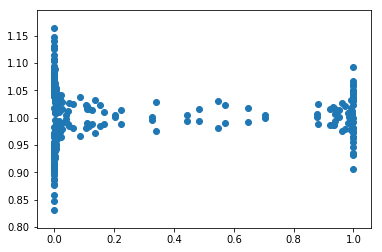

In [19]:
plt.scatter(uncty.error.reshape(-1), uncty_mtx.reshape(-1))

In [48]:
corr0 = pearsonr(uncty.error[:,0], uncty_mtx[:,0])
corr0

(-0.40023506950613785, 3.883095829044023e-07)

In [49]:
corr1 = pearsonr(uncty.error[:,1], uncty_mtx[:,1])
corr1

(0.37967774759483847, 1.6524337887406638e-06)

(array([96.,  8.,  2.,  2.,  2.,  2.,  1.,  1.,  2., 34.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

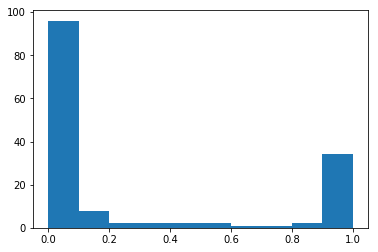

In [21]:
plt.hist(uncty.error[:,0])

Text(0.5,1,'image class = 0')

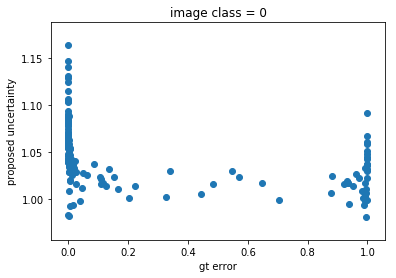

In [22]:
plt.scatter(uncty.error[:,0], uncty_mtx[:,0])
plt.xlabel('gt error')
plt.ylabel('proposed uncertainty')
plt.title('image class = 0')

Text(0.5,1,'image class = 1')

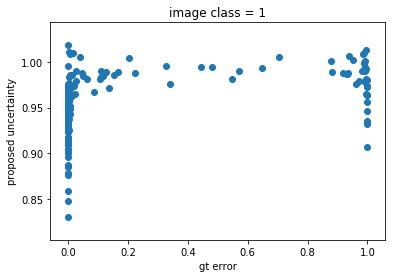

In [23]:
plt.scatter(uncty.error[:,1], uncty_mtx[:,1])
plt.xlabel('gt error')
plt.ylabel('proposed uncertainty')
plt.title('image class = 1')

Text(0.5,1,'the gt error and the proposed uncertainty for the query 150 images')

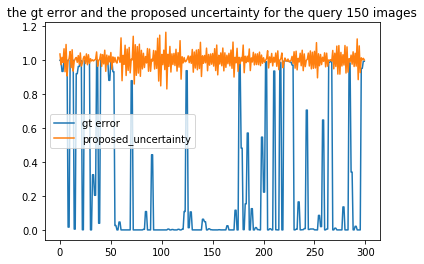

In [24]:
plt.plot(uncty.error.reshape(-1))
plt.plot(uncty_mtx.reshape(-1))
plt.legend(['gt error', 'proposed_uncertainty'])
plt.title('the gt error and the proposed uncertainty for the query 150 images')

Text(0.5,1,'the gt error and the proposed uncertainty for the query 150 images, when class = 0')

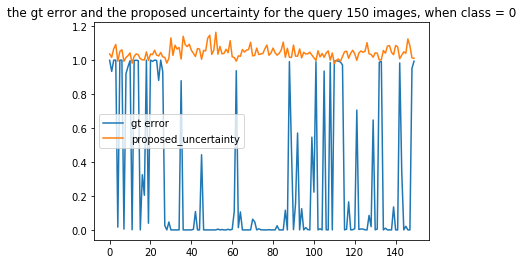

In [25]:
plt.plot(uncty.error[:,0])
plt.plot(uncty_mtx[:,0])
plt.legend(['gt error', 'proposed_uncertainty'])
plt.title('the gt error and the proposed uncertainty for the query 150 images, when class = 0')

Text(0.5,1,'the gt error and the proposed uncertainty for the query 150 images, when class = 1')

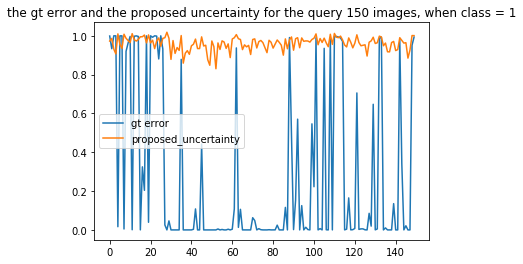

In [26]:
plt.plot(uncty.error[:,1])
plt.plot(uncty_mtx[:,1])
plt.legend(['gt error', 'proposed_uncertainty'])
plt.title('the gt error and the proposed uncertainty for the query 150 images, when class = 1')

# all neurons

In [27]:
sim_method = 'cosine'
uncty_mtx = uncty.get_uncertain_matrix(clpt_mtx, uncty.query_actv, sim_method)     

In [28]:
uncty_mtx.shape

(150, 2)

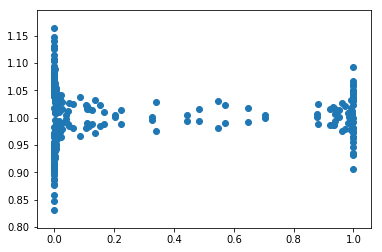

In [29]:
plt.scatter(uncty.error.reshape(-1), uncty_mtx.reshape(-1))

In [30]:
from scipy.stats import pearsonr
corr = pearsonr(uncty.error.reshape(-1), uncty_mtx.reshape(-1))
corr

(-0.005539359032054541, 0.9238821805562573)

In [31]:
corr0 = pearsonr(uncty.error[:,0], uncty_mtx[:,0])
corr0

(-0.40023506950613785, 3.883095829044023e-07)

Text(0.5,1,'image class = 0')

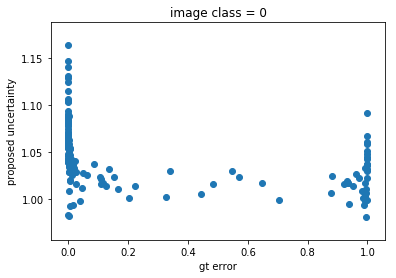

In [32]:
plt.scatter(uncty.error[:,0], uncty_mtx[:,0])
plt.xlabel('gt error')
plt.ylabel('proposed uncertainty')
plt.title('image class = 0')

In [33]:
corr1 = pearsonr(uncty.error[:,1], uncty_mtx[:,1])
corr1

(0.37967774759483847, 1.6524337887406638e-06)

Text(0.5,1,'image class = 1')

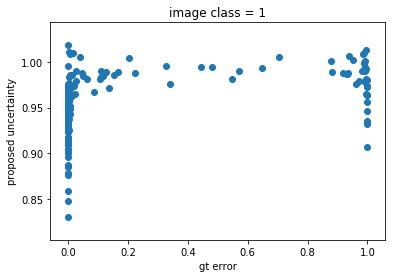

In [34]:
plt.scatter(uncty.error[:,1], uncty_mtx[:,1])
plt.xlabel('gt error')
plt.ylabel('proposed uncertainty')
plt.title('image class = 1')

Text(0.5,1,'the gt error and the proposed uncertainty for the query 150 images')

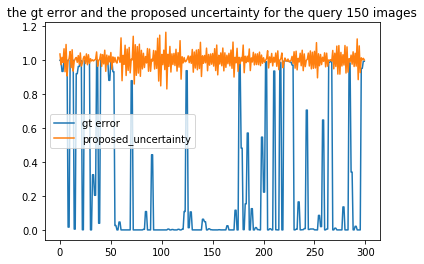

In [35]:
plt.plot(uncty.error.reshape(-1))
plt.plot(uncty_mtx.reshape(-1))
plt.legend(['gt error', 'proposed_uncertainty'])
plt.title('the gt error and the proposed uncertainty for the query 150 images')

Text(0.5,1,'the gt error and the proposed uncertainty for the query 150 images, when class = 1')

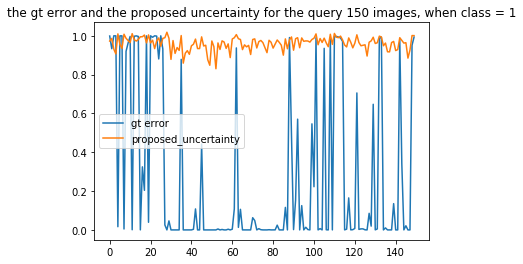

In [36]:
plt.plot(uncty.error[:,1])
plt.plot(uncty_mtx[:,1])
plt.legend(['gt error', 'proposed_uncertainty'])
plt.title('the gt error and the proposed uncertainty for the query 150 images, when class = 1')

Text(0.5,1,'the gt error and the proposed uncertainty for the query 150 images, when class = 0')

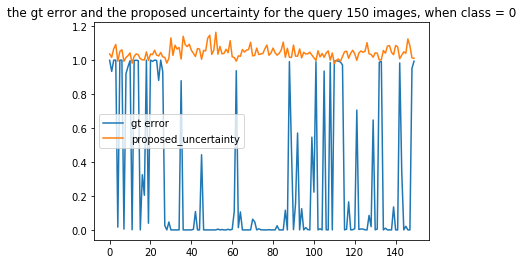

In [37]:
plt.plot(uncty.error[:,0])
plt.plot(uncty_mtx[:,0])
plt.legend(['gt error', 'proposed_uncertainty'])
plt.title('the gt error and the proposed uncertainty for the query 150 images, when class = 0')

In [38]:
bsl_clpt = uncty.get_baseline(clpt_mtx)

In [39]:
bsl_uncty_mtx = uncty.get_uncertain_matrix(bsl_clpt, uncty.query_actv, sim_method)     

In [40]:
bsl_corr0 = pearsonr(uncty.error[:,0], bsl_uncty_mtx[:,0])
bsl_corr0

(-0.1769529804155151, 0.0302945955881074)

Text(0.5,1,'baseline random culprit mtx: image class = 0')

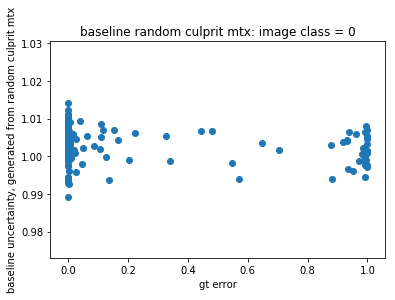

In [41]:
plt.scatter(uncty.error[:,0], bsl_uncty_mtx[:,0])
plt.xlabel('gt error')
plt.ylabel('baseline uncertainty, generated from random culprit mtx')
plt.title('baseline random culprit mtx: image class = 0')

In [42]:
bsl_corr1 = pearsonr(uncty.error[:,1], bsl_uncty_mtx[:,1])
bsl_corr1

(-0.08659494279498521, 0.2920314187803622)

Text(0.5,1,'baseline random culprit mtx: image class = 1')

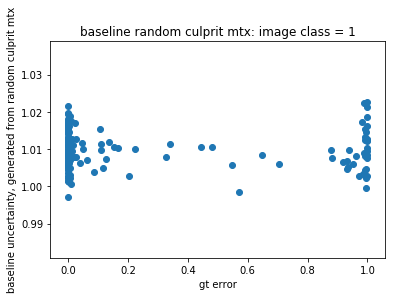

In [43]:
plt.scatter(uncty.error[:,1], bsl_uncty_mtx[:,1])
plt.xlabel('gt error')
plt.ylabel('baseline uncertainty, generated from random culprit mtx')
plt.title('baseline random culprit mtx: image class = 1')

Text(0.5,1,'the gt error and the baseline uncertainty for the query 150 images, when class = 0')

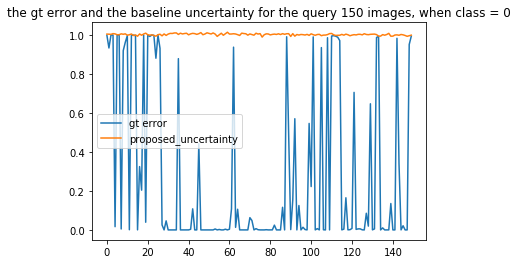

In [44]:
plt.plot(uncty.error[:,0])
plt.plot(bsl_uncty_mtx[:,0])
plt.legend(['gt error', 'proposed_uncertainty'])
plt.title('the gt error and the baseline uncertainty for the query 150 images, when class = 0')

Text(0.5,1,'the gt error and the baseline uncertainty for the query 150 images, when class = 1')

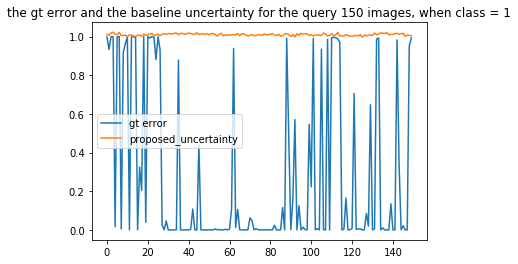

In [45]:
plt.plot(uncty.error[:,1])
plt.plot(bsl_uncty_mtx[:,1])
plt.legend(['gt error', 'proposed_uncertainty'])
plt.title('the gt error and the baseline uncertainty for the query 150 images, when class = 1')

# for visualizaiton prototype

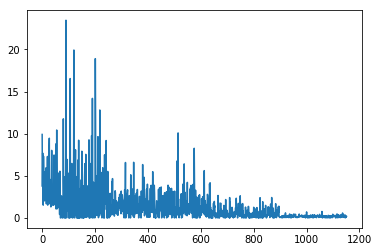

In [46]:
datapoint = 1
inspect_cls = 0
plt.plot(uncty.query_actv[datapoint][:1152].numpy())

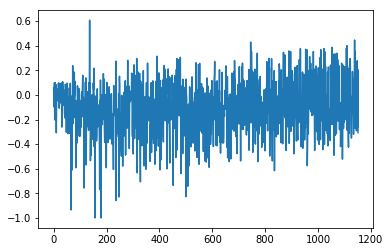

In [47]:
plt.plot(np.arange(0, len(clpt_mtx[inspect_cls][:1152])), clpt_mtx[inspect_cls][:1152])